In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading in niaaa csv data
niaaa_path = "../resources/niaaa_data_normalized.csv"
niaaa_df = pd.read_csv(niaaa_path)
niaaa_df

,Year (4-digit calendar year),"Geographic ID code (FIPS code, see specification below)",Type of beverage (see specification below),Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,State_Region,Type of Beverage,Source
0,1970,1,1,3863000,1738350,2499000,6956,9,2020000,8606,9,.,.,.,Alabama,Spirits,unknown
1,1970,1,2,1412000,225920,2499000,904,9,2020000,1118,9,.,.,.,Alabama,Wine,unknown
2,1970,1,3,33098000,1489410,2499000,5960,10,2020000,7373,10,.,.,.,Alabama,Beer,unknown
3,1970,1,4,.,3453680,2499000,13820,10,2020000,17097,10,.,.,.,Alabama,All beverages,unknown
4,1970,2,1,945000,425250,205000,20744,1,165000,25773,1,.,.,.,Alaska,Spirits,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,2018,94,4,.,160326587,64146752,24994,.,57158011,28050,.,.,.,157741755,West Region,All beverages,unknown
10972,2018,99,1,570983458,234674202,270449061,8677,.,240910947,9741,.,.,384,219257648,United States,Spirits,unknown
10973,2018,99,2,913944969,117898901,270449061,4359,.,240910947,4894,.,.,117,106931561,United States,Wine,unknown
10974,2018,99,3,6318315520,284324198,270449061,10513,.,240910947,11802,.,.,48,303279145,United States,Beer,unknown


In [3]:
niaaa_df_col = niaaa_df.rename(columns={"Year (4-digit calendar year)" : "Year",
                                       "Geographic ID code (FIPS code, see specification below)" : "Geo ID Code",
                                       "Type of beverage (see specification below)" : "Beverage Type Code"},
                                       )
niaaa_df_col

,Year,Geo ID Code,Beverage Type Code,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,State_Region,Type of Beverage,Source
0,1970,1,1,3863000,1738350,2499000,6956,9,2020000,8606,9,.,.,.,Alabama,Spirits,unknown
1,1970,1,2,1412000,225920,2499000,904,9,2020000,1118,9,.,.,.,Alabama,Wine,unknown
2,1970,1,3,33098000,1489410,2499000,5960,10,2020000,7373,10,.,.,.,Alabama,Beer,unknown
3,1970,1,4,.,3453680,2499000,13820,10,2020000,17097,10,.,.,.,Alabama,All beverages,unknown
4,1970,2,1,945000,425250,205000,20744,1,165000,25773,1,.,.,.,Alaska,Spirits,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,2018,94,4,.,160326587,64146752,24994,.,57158011,28050,.,.,.,157741755,West Region,All beverages,unknown
10972,2018,99,1,570983458,234674202,270449061,8677,.,240910947,9741,.,.,384,219257648,United States,Spirits,unknown
10973,2018,99,2,913944969,117898901,270449061,4359,.,240910947,4894,.,.,117,106931561,United States,Wine,unknown
10974,2018,99,3,6318315520,284324198,270449061,10513,.,240910947,11802,.,.,48,303279145,United States,Beer,unknown


In [4]:
# normalizing object types to float
gal_of_bev_num = pd.to_numeric(niaaa_df_col["Gallons of beverage"], errors='coerce')


In [5]:
# adding column back into the df
niaaa_df_col["Gallons of beverage"] = gal_of_bev_num

# fill na with zero
niaaa_df_col_drop = niaaa_df_col.fillna(0)

# normalizing columns by the millions
niaaa_df_col_drop["Gallons of beverage"] = niaaa_df_col_drop["Gallons of beverage"] / 1000000
niaaa_df_col_drop["Gallons of ethanol (absolute alcohol)"] = niaaa_df_col_drop["Gallons of ethanol (absolute alcohol)"] / 1000000
niaaa_df_col_drop["Population (age 14 and older)"] = niaaa_df_col_drop["Population (age 14 and older)"] / 1000000
niaaa_df_col_drop["Population (age 21 and older)"] = niaaa_df_col_drop["Population (age 21 and older)"] / 1000000
niaaa_df_col_drop

,Year,Geo ID Code,Beverage Type Code,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,State_Region,Type of Beverage,Source
0,1970,1,1,3.863000,1.738350,2.499000,6956,9,2.020000,8606,9,.,.,.,Alabama,Spirits,unknown
1,1970,1,2,1.412000,0.225920,2.499000,904,9,2.020000,1118,9,.,.,.,Alabama,Wine,unknown
2,1970,1,3,33.098000,1.489410,2.499000,5960,10,2.020000,7373,10,.,.,.,Alabama,Beer,unknown
3,1970,1,4,0.000000,3.453680,2.499000,13820,10,2.020000,17097,10,.,.,.,Alabama,All beverages,unknown
4,1970,2,1,0.945000,0.425250,0.205000,20744,1,0.165000,25773,1,.,.,.,Alaska,Spirits,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10971,2018,94,4,0.000000,160.326587,64.146752,24994,.,57.158011,28050,.,.,.,157741755,West Region,All beverages,unknown
10972,2018,99,1,570.983458,234.674202,270.449061,8677,.,240.910947,9741,.,.,384,219257648,United States,Spirits,unknown
10973,2018,99,2,913.944969,117.898901,270.449061,4359,.,240.910947,4894,.,.,117,106931561,United States,Wine,unknown
10974,2018,99,3,6318.315520,284.324198,270.449061,10513,.,240.910947,11802,.,.,48,303279145,United States,Beer,unknown


In [85]:
# creating df for us as a whole
us_df = niaaa_df_col_drop.loc[niaaa_df_col_drop["State_Region"] == "United States"]

# creating df for states only
states_list = [ 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
               'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
               'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
               'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
               'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
               'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
               'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

states_df = niaaa_df_col_drop.loc[niaaa_df_col_drop["State_Region"].isin(states_list)]


In [86]:
# creating df lookking at yearly stats us... only filtering on all beverages by year
us_df_all_bev = us_df.loc[us_df["Type of Beverage"] == "All beverages"]
us_df_all_bev = us_df_all_bev.set_index('Year')

In [87]:
# pulling summary table from other exercise
# reading in niaaa csv data
sum_us_df_path = "output/niaaa_us_yearly_consumption_stats_clean.csv"
sum_us_df = pd.read_csv(sum_us_df_path)


In [89]:
print(len(sum_us_df))
print(len(us_df_all_bev))

49
49


In [90]:
gob_sum_df = sum_us_df[["Year","Gallons of beverage"]]
gob_sum_df = gob_sum_df.set_index("Year")

In [91]:
merge_us_dfs = pd.merge(us_df_all_bev,gob_sum_df,left_index=True, right_index=True)
merge_us_dfs_rn = merge_us_dfs.rename(columns= {"Gallons of beverage_y" : "Gallons of beverage", 
                              "Gallons of ethanol (absolute alcohol)" : "Gallons of ethanol"})
us_sum_df_final = merge_us_dfs_rn[["State_Region", "Type of Beverage", "Gallons of beverage", "Gallons of ethanol", 
                    "Population (age 14 and older)", "Gallons of ethanol per capita age 14 and older", 
                    "Population (age 21 and older)", "Gallons of ethanol per capita age 21 and older"]]
us_sum_df_final

,State_Region,Type of Beverage,Gallons of beverage,Gallons of ethanol,Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older
Year,,,,,,,,
1970,United States,All beverages,4395.283000,377.002200,149.396000,25235,122.722000,30720
1971,United States,All beverages,4597.432000,395.650890,153.347060,25801,125.687741,31479
1972,United States,All beverages,4756.230000,398.096475,156.503574,25437,128.187640,31056
1973,United States,All beverages,4985.675000,414.596420,159.460299,26000,130.623102,31740
1974,United States,All beverages,5226.544000,429.670420,162.390186,26459,133.110083,32279
1975,United States,All beverages,5383.539000,441.124105,165.424923,26666,135.748050,32496
1976,United States,All beverages,5479.721000,447.736565,168.429779,26583,138.514051,32324
1977,United States,All beverages,5670.802000,446.320710,171.341543,26049,141.335304,31579
1978,United States,All beverages,5906.943000,463.929069,174.266557,26622,144.339546,32142


In [92]:
states_df_all_bev = states_df.loc[states_df["Type of Beverage"] == "All beverages"]
states_df_all_bev = states_df_all_bev.reset_index()
states_df_all_bev

,index,Year,Geo ID Code,Beverage Type Code,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,State_Region,Type of Beverage,Source
0,3,1970,1,4,0.0,3.453680,2.499000,13820,10,2.020000,17097,10,.,.,.,Alabama,All beverages,unknown
1,7,1970,2,4,0.0,0.742190,0.205000,36204,1,0.165000,44981,1,.,.,.,Alaska,All beverages,unknown
2,11,1970,4,4,0.0,3.473610,1.272000,27308,4,1.031000,33692,4,.,.,.,Arizona,All beverages,unknown
3,15,1970,5,4,0.0,2.037140,1.422000,14326,10,1.169000,17426,10,.,.,.,Arkansas,All beverages,unknown
4,19,1970,6,4,0.0,46.020375,14.811000,31072,2,12.247000,37577,2,.,.,.,California,All beverages,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10939,2018,51,4,0.0,15.092715,7.069681,21349,8,6.307643,23928,8,.,.,14633210,Virginia,All beverages,unknown
2495,10943,2018,53,4,0.0,13.869568,6.233886,22249,7,5.606920,24737,7,.,.,13732334,Washington,All beverages,unknown
2496,10947,2018,54,4,0.0,2.652751,1.526224,17381,10,1.375788,19282,10,.,.,2648404,West Virginia,All beverages,unknown
2497,10951,2018,55,4,0.0,14.177810,4.834403,29327,2,4.302174,32955,2,.,.,14065287,Wisconsin,All beverages,unknown


In [14]:
states_year_group = states_df.groupby(["Year","State_Region"])
year_gob_sum_states = states_gob_group["Gallons of beverage"].sum()
states_gob_year_df = pd.DataFrame(year_gob_sum_states)
states_gob_year_df_reset = states_gob_year_df.reset_index()
states_gob_year_df_reset

,Year,State_Region,Gallons of beverage
0,1970,Alabama,38.373000
1,1970,Alaska,6.787000
2,1970,Arizona,44.079000
3,1970,Arkansas,25.436000
4,1970,California,467.306000
...,...,...,...
2494,2018,Virginia,187.310410
2495,2018,Washington,162.596822
2496,2018,West Virginia,42.186947
2497,2018,Wisconsin,168.112429


In [93]:
merge_states_dfs = pd.merge(states_df_all_bev,states_gob_year_df_reset,left_index=True, right_index=True)
merge_states_dfs

,index,Year_x,Geo ID Code,Beverage Type Code,Gallons of beverage_x,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),...,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,State_Region_x,Type of Beverage,Source,Year_y,State_Region_y,Gallons of beverage_y
0,3,1970,1,4,0.0,3.453680,2.499000,13820,10,2.020000,...,10,.,.,.,Alabama,All beverages,unknown,1970,Alabama,38.373000
1,7,1970,2,4,0.0,0.742190,0.205000,36204,1,0.165000,...,1,.,.,.,Alaska,All beverages,unknown,1970,Alaska,6.787000
2,11,1970,4,4,0.0,3.473610,1.272000,27308,4,1.031000,...,4,.,.,.,Arizona,All beverages,unknown,1970,Arizona,44.079000
3,15,1970,5,4,0.0,2.037140,1.422000,14326,10,1.169000,...,10,.,.,.,Arkansas,All beverages,unknown,1970,Arkansas,25.436000
4,19,1970,6,4,0.0,46.020375,14.811000,31072,2,12.247000,...,2,.,.,.,California,All beverages,unknown,1970,California,467.306000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,10939,2018,51,4,0.0,15.092715,7.069681,21349,8,6.307643,...,8,.,.,14633210,Virginia,All beverages,unknown,2018,Virginia,187.310410
2495,10943,2018,53,4,0.0,13.869568,6.233886,22249,7,5.606920,...,7,.,.,13732334,Washington,All beverages,unknown,2018,Washington,162.596822
2496,10947,2018,54,4,0.0,2.652751,1.526224,17381,10,1.375788,...,10,.,.,2648404,West Virginia,All beverages,unknown,2018,West Virginia,42.186947
2497,10951,2018,55,4,0.0,14.177810,4.834403,29327,2,4.302174,...,2,.,.,14065287,Wisconsin,All beverages,unknown,2018,Wisconsin,168.112429


In [94]:
merge_states_dfs_rn = merge_states_dfs.rename(columns= {"Year_x" : "Year" , "State_Region_x" : "State_Region" , 
                                                          "Gallons of beverage_y" : "Gallons of beverage",
                                                          "Gallons of ethanol (absolute alcohol)" : "Gallons of ethanol"})
states_all_bev_final = merge_states_dfs_rn[["Year","State_Region", "Type of Beverage", "Gallons of beverage", 
                                           "Gallons of ethanol", "Population (age 14 and older)", 
                                           "Gallons of ethanol per capita age 14 and older", 
                                           "Population (age 21 and older)", "Gallons of ethanol per capita age 21 and older"]]
states_all_bev_final

,Year,State_Region,Type of Beverage,Gallons of beverage,Gallons of ethanol,Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older
0,1970,Alabama,All beverages,38.373000,3.453680,2.499000,13820,2.020000,17097
1,1970,Alaska,All beverages,6.787000,0.742190,0.205000,36204,0.165000,44981
2,1970,Arizona,All beverages,44.079000,3.473610,1.272000,27308,1.031000,33692
3,1970,Arkansas,All beverages,25.436000,2.037140,1.422000,14326,1.169000,17426
4,1970,California,All beverages,467.306000,46.020375,14.811000,31072,12.247000,37577
...,...,...,...,...,...,...,...,...,...
2494,2018,Virginia,All beverages,187.310410,15.092715,7.069681,21349,6.307643,23928
2495,2018,Washington,All beverages,162.596822,13.869568,6.233886,22249,5.606920,24737
2496,2018,West Virginia,All beverages,42.186947,2.652751,1.526224,17381,1.375788,19282
2497,2018,Wisconsin,All beverages,168.112429,14.177810,4.834403,29327,4.302174,32955


In [95]:
# output data on states stats by year
state_year_path = "output/niaaa_state_level_yearly_consumption_stats_clean.csv"
states_sum_df_final.to_csv(state_year_path ,index=False)

In [105]:
# creating df for only wine, beer, spirits and states

type_alc = ["Spirits","Wine","Beer"]
us_df_bev_type = us_df.loc[us_df["Type of Beverage"].isin(type_alc)]
states_df_bev_type = states_df.loc[states_df["Type of Beverage"].isin(type_alc)]
us_df_bev_type

,Year,Geo ID Code,Beverage Type Code,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,State_Region,Type of Beverage,Source
220,1970,99,1,369.870000,166.441500,149.396000,11141,.,122.722000,13562,.,.,.,.,United States,Spirits,unknown
221,1970,99,2,255.801000,40.928160,149.396000,2740,.,122.722000,3335,.,.,.,.,United States,Wine,unknown
222,1970,99,3,3769.612000,169.632540,149.396000,11355,.,122.722000,13823,.,.,.,.,United States,Beer,unknown
444,1971,99,1,382.117000,171.952650,153.347060,11213,.,125.687741,13681,.,.,.,.,United States,Spirits,unknown
445,1971,99,2,295.731000,47.316960,153.347060,3086,.,125.687741,3765,.,.,.,.,United States,Wine,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,2017,99,2,905.883151,116.858928,268.308621,4355,.,238.814105,4893,.,.,118,106894212,United States,Wine,unknown
10750,2017,99,3,6347.705518,285.646748,268.308621,10646,.,238.814105,11961,.,.,48,304689865,United States,Beer,unknown
10972,2018,99,1,570.983458,234.674202,270.449061,8677,.,240.910947,9741,.,.,384,219257648,United States,Spirits,unknown
10973,2018,99,2,913.944969,117.898901,270.449061,4359,.,240.910947,4894,.,.,117,106931561,United States,Wine,unknown


In [21]:
# reindexing on state and year
states_df_bev_type_ind = states_df_bev_type.set_index(['Year','State_Region'])
states_df_bev_type_ind

Geo ID Code  Beverage Type Code  Gallons of beverage  \
Year State_Region                                                         
1970 Alabama                 1                   1             3.863000   
     Alabama                 1                   2             1.412000   
     Alabama                 1                   3            33.098000   
     Alaska                  2                   1             0.945000   
     Alaska                  2                   2             0.470000   
...                        ...                 ...                  ...   
2018 Wisconsin              55                   2            14.651427   
     Wisconsin              55                   3           138.756000   
     Wyoming                56                   1             1.425973   
     Wyoming                56                   2             1.161350   
     Wyoming                56                   3            12.782675   

                   Gallons of ethanol (absolute alcohol)  \
Year State_Region                                          
1970 Alabama                                    1.738350   
     Alabama                                    0.225920   
     Alabama                                    1.489410   
     Alaska                                     0.425250   
     Alaska                                     0.075200   
...                                                  ...   
2018 Wisconsin                                  1.890034   
     Wisconsin                                  6.244020   
     Wyoming                                    0.586075   
     Wyoming                                    0.149814   
     Wyoming                                    0.575220   

                   Population (age 14 and older)  \
Year State_Region                                  
1970 Alabama                            2.499000   
     Alabama                            2.499000   
     Alabama                            2.499000   
     Alaska                             0.205000   
     Alaska                             0.205000   
...                                          ...   
2018 Wisconsin                          4.834403   
     Wisconsin                          4.834403   
     Wyoming                            0.472325   
     Wyoming                            0.472325   
     Wyoming                            0.472325   

                   Gallons of ethanol per capita age 14 and older  \
Year State_Region                                                   
1970 Alabama                                                 6956   
     Alabama                                                  904   
     Alabama                                                 5960   
     Alaska                                                 20744   
     Alaska                                                  3668   
...                                                           ...   
2018 Wisconsin                                               3910   
     Wisconsin                                              12916   
     Wyoming                                                12408   
     Wyoming                                                 3172   
     Wyoming                                                12178   

                  Decile for per capita consumption age 14 and older  \
Year State_Region                                                      
1970 Alabama                                                       9   
     Alabama                                                       9   
     Alabama                                                      10   
     Alaska                                                        1   
     Alaska                                                        2   
...                                                              ...   
2018 Wisconsin                                                     6   
     Wisconsin                         

In [ ]:
# layering in percentages of total for each type
# win_perc = []
# for state in states_list
    

In [97]:
# creating group bys for most and least popular by state by year
states_year_group_type = states_df_bev_type.groupby(["Year","State_Region"])
max_gob_states_type_year = states_year_group_type["Gallons of beverage"].max()
max_goe_states_type_year = states_year_group_type["Gallons of ethanol (absolute alcohol)"].max()

In [98]:
# merging group by on max gob with state_year_type_df
merge_states_year_type_df_gob = pd.merge(states_df_bev_type_ind,max_gob_states_type_year,left_index=True, right_index=True)
states_year_type_df_gob = merge_states_year_type_df_gob.rename(columns={"Gallons of beverage_x" : "Gallons of beverage",
                                         "Gallons of beverage_y" : "Gallons of beverage_max"})
#using conditional to find the max gob spirit name
max_gob_year_state = states_year_type_df_gob.loc[states_year_type_df_gob["Gallons of beverage_max"] == states_year_type_df_gob["Gallons of beverage"]]
max_gob_year_state_df = max_gob_year_state["Type of Beverage"]
max_gob_year_state_df

Year  State_Region 
1970  Alabama          Beer
      Alaska           Beer
      Arizona          Beer
      Arkansas         Beer
      California       Beer
                       ... 
2018  Virginia         Beer
      Washington       Beer
      West Virginia    Beer
      Wisconsin        Beer
      Wyoming          Beer
Name: Type of Beverage, Length: 2499, dtype: object

In [99]:
# merging group by on max goe with state_year_type_df
merge_states_year_type_df_goe = pd.merge(states_df_bev_type_ind,max_goe_states_type_year,left_index=True, right_index=True)
states_year_type_df_goe = merge_states_year_type_df_goe.rename(columns={"Gallons of ethanol (absolute alcohol)_x" : "Gallons of ethanol (absolute alcohol)",
                                                                "Gallons of ethanol (absolute alcohol)_y" : "Gallons of ethanol (absolute alcohol)_max"})
#using conditional to find the max goe spirit name
max_goe_year_state = states_year_type_df_goe.loc[states_year_type_df_goe["Gallons of ethanol (absolute alcohol)_max"] == states_year_type_df["Gallons of ethanol (absolute alcohol)"]]
max_goe_year_state_df = max_goe_year_state["Type of Beverage"]
max_goe_year_state_df

Year  State_Region 
1970  Alabama          Spirits
      Alaska           Spirits
      Arizona             Beer
      Arkansas            Beer
      California       Spirits
                        ...   
2018  Virginia            Beer
      Washington          Beer
      West Virginia       Beer
      Wisconsin           Beer
      Wyoming          Spirits
Name: Type of Beverage, Length: 2499, dtype: object

In [233]:
max_goe_year_state_df.loc[2018]

State_Region
Alabama                    Beer
Alaska                  Spirits
Arizona                    Beer
Arkansas                   Beer
California                 Beer
Colorado                Spirits
Connecticut             Spirits
Delaware                Spirits
District of Columbia    Spirits
Florida                    Beer
Georgia                    Beer
Hawaii                     Beer
Idaho                      Wine
Illinois                   Beer
Indiana                    Beer
Iowa                       Beer
Kansas                     Beer
Kentucky                   Beer
Louisiana                  Beer
Maine                      Beer
Maryland                Spirits
Massachusetts           Spirits
Michigan                   Beer
Minnesota               Spirits
Mississippi                Beer
Missouri                   Beer
Montana                    Beer
Nebraska                   Beer
Nevada                  Spirits
New Hampshire           Spirits
New Jersey              Spi

In [100]:
high_types_states_year_df = pd.merge(states_year_type_df, max_gob_year_state_df,left_index=True, right_index=True)
high_types_states_year_df_1 = high_types_states_year_df.rename(columns={"Type of Beverage_x" : "Type of Beverage",
                                         "Type of Beverage_y" : "Most Popular Type by GOB"})
high_types_states_year_df_2 = pd.merge(high_types_states_year_df_1, max_goe_year_state_df,left_index=True, right_index=True)
high_types_states_year_final = high_types_states_year_df_2.rename(columns={"Type of Beverage_x" : "Type of Beverage",
                                         "Type of Beverage_y" : "Most Popular Type by GOE"})
high_types_states_year_final

Geo ID Code  Beverage Type Code  Gallons of beverage  \
Year State_Region                                                         
1970 Alabama                 1                   1             3.863000   
     Alabama                 1                   2             1.412000   
     Alabama                 1                   3            33.098000   
     Alaska                  2                   1             0.945000   
     Alaska                  2                   2             0.470000   
...                        ...                 ...                  ...   
2018 Wisconsin              55                   2            14.651427   
     Wisconsin              55                   3           138.756000   
     Wyoming                56                   1             1.425973   
     Wyoming                56                   2             1.161350   
     Wyoming                56                   3            12.782675   

                   Gallons of ethanol (absolute alcohol)  \
Year State_Region                                          
1970 Alabama                                    1.738350   
     Alabama                                    0.225920   
     Alabama                                    1.489410   
     Alaska                                     0.425250   
     Alaska                                     0.075200   
...                                                  ...   
2018 Wisconsin                                  1.890034   
     Wisconsin                                  6.244020   
     Wyoming                                    0.586075   
     Wyoming                                    0.149814   
     Wyoming                                    0.575220   

                   Population (age 14 and older)  \
Year State_Region                                  
1970 Alabama                            2.499000   
     Alabama                            2.499000   
     Alabama                            2.499000   
     Alaska                             0.205000   
     Alaska                             0.205000   
...                                          ...   
2018 Wisconsin                          4.834403   
     Wisconsin                          4.834403   
     Wyoming                            0.472325   
     Wyoming                            0.472325   
     Wyoming                            0.472325   

                   Gallons of ethanol per capita age 14 and older  \
Year State_Region                                                   
1970 Alabama                                                 6956   
     Alabama                                                  904   
     Alabama                                                 5960   
     Alaska                                                 20744   
     Alaska                                                  3668   
...                                                           ...   
2018 Wisconsin                                               3910   
     Wisconsin                                              12916   
     Wyoming                                                12408   
     Wyoming                                                 3172   
     Wyoming                                                12178   

                  Decile for per capita consumption age 14 and older  \
Year State_Region                                                      
1970 Alabama                                                       9   
     Alabama                                                       9   
     Alabama                                                      10   
     Alaska                                                        1   
     Alaska                                                        2   
...                                                              ...   
2018 Wisconsin                                                     6   
     Wisconsin                         

In [102]:
# most popular by state by year

most_pop_state_year_1 = pd.merge(max_gob_year_state_df, max_goe_year_state_df,left_index=True, right_index=True)
most_pop_state_year = most_pop_state_year_1.rename(columns={"Type of Beverage_x" : "Most Popular Type by GOB",
                                         "Type of Beverage_y" : "Most Popular Type by GOE"})
most_pop_state_year

Most Popular Type by GOB Most Popular Type by GOE
Year State_Region                                                   
1970 Alabama                           Beer                  Spirits
     Alaska                            Beer                  Spirits
     Arizona                           Beer                     Beer
     Arkansas                          Beer                     Beer
     California                        Beer                  Spirits
...                                     ...                      ...
2018 Virginia                          Beer                     Beer
     Washington                        Beer                     Beer
     West Virginia                     Beer                     Beer
     Wisconsin                         Beer                     Beer
     Wyoming                           Beer                  Spirits

[2499 rows x 2 columns]

In [103]:
# output data on stats by year
most_pop_state_year_path = "output/most_popular_alc_by_state_by_year.csv"
most_pop_state_year.to_csv(most_pop_state_year_path,index=True)

PermissionError: [Errno 13] Permission denied: 'output/most_popular_alc_by_state_by_year.csv'

In [104]:
re_states_df_bev_type_ind = states_df_bev_type_ind.reset_index()
re_states_df_bev_type_ind

,Year,State_Region,Geo ID Code,Beverage Type Code,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,Type of Beverage,Source
0,1970,Alabama,1,1,3.863000,1.738350,2.499000,6956,9,2.020000,8606,9,.,.,.,Spirits,unknown
1,1970,Alabama,1,2,1.412000,0.225920,2.499000,904,9,2.020000,1118,9,.,.,.,Wine,unknown
2,1970,Alabama,1,3,33.098000,1.489410,2.499000,5960,10,2.020000,7373,10,.,.,.,Beer,unknown
3,1970,Alaska,2,1,0.945000,0.425250,0.205000,20744,1,0.165000,25773,1,.,.,.,Spirits,unknown
4,1970,Alaska,2,2,0.470000,0.075200,0.205000,3668,2,0.165000,4558,2,.,.,.,Wine,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,2018,Wisconsin,55,2,14.651427,1.890034,4.834403,3910,6,4.302174,4393,6,1,118,1728868,Wine,State monthly sales volume data
7493,2018,Wisconsin,55,3,138.756000,6.244020,4.834403,12916,2,4.302174,14514,2,7,48,6660288,Beer,Industry
7494,2018,Wyoming,56,1,1.425973,0.586075,0.472325,12408,2,0.421045,13920,2,6,372,530462,Spirits,NABCA annual sales volume data
7495,2018,Wyoming,56,2,1.161350,0.149814,0.472325,3172,7,0.421045,3558,7,6,117,135878,Wine,NABCA annual sales volume data


In [238]:
test_pie_chart_wy = re_states_df_bev_type_ind.loc[re_states_df_bev_type_ind["State_Region"] == "Wyoming"]
test_pie_chart_il = re_states_df_bev_type_ind.loc[re_states_df_bev_type_ind["State_Region"] == "Illinois"]
test_pie_chart_id = re_states_df_bev_type_ind.loc[re_states_df_bev_type_ind["State_Region"] == "Idaho"]
test_pie_chart_wy_2018 = test_pie_chart_wy.loc[test_pie_chart_wy["Year"] == 2018]
test_pie_chart_wy_1970 = test_pie_chart_wy.loc[test_pie_chart_wy["Year"] == 1970]
test_pie_chart_il_2018 = test_pie_chart_il.loc[test_pie_chart_il["Year"] == 2018]
test_pie_chart_il_1970 = test_pie_chart_il.loc[test_pie_chart_il["Year"] == 1970]
test_pie_chart_id_2018 = test_pie_chart_id.loc[test_pie_chart_id["Year"] == 2018]
test_pie_chart_id_1970 = test_pie_chart_id.loc[test_pie_chart_id["Year"] == 1970]
test_pie_chart_id_1970

,Year,State_Region,Geo ID Code,Beverage Type Code,Gallons of beverage,Gallons of ethanol (absolute alcohol),Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,Type of Beverage,Source
36,1970,Idaho,16,1,0.853,0.383850,0.513,7482,8,0.41,9362,8,.,.,.,Spirits,unknown
37,1970,Idaho,16,2,0.312,0.049920,0.513,973,9,0.41,1218,9,.,.,.,Wine,unknown
38,1970,Idaho,16,3,13.635,0.613575,0.513,11961,5,0.41,14965,4,.,.,.,Beer,unknown


<AxesSubplot:ylabel='Gallons of ethanol (absolute alcohol)'>

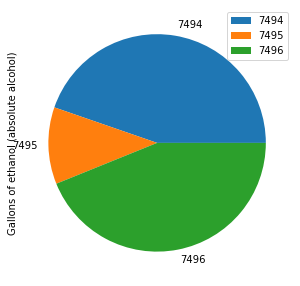

In [63]:
#plot pie
test_pie_chart_wy_2018.plot.pie(y='Gallons of ethanol (absolute alcohol)', figsize=(5, 5))

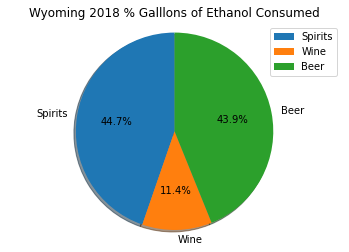

In [64]:
# declaring variables
wy_gob_2018 = test_pie_chart_wy_2018["Gallons of ethanol (absolute alcohol)"]
wy_gob_2018_labels = test_pie_chart_wy_2018["Type of Beverage"]

# creating pie plot
plt.title("Wyoming 2018 % Galllons of Ethanol Consumed")
plt.pie(wy_gob_2018, labels=wy_gob_2018_labels, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(wy_gob_2018_labels)
plt.axis("equal")
plt.show()

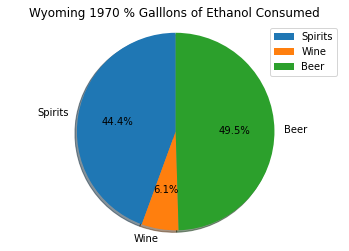

In [72]:
# declaring variables adding *100 because it helps for the percentage calc
wy_gob_1970 = round(test_pie_chart_wy_1970["Gallons of ethanol (absolute alcohol)"],6) * 100
wy_gob_1970_labels = test_pie_chart_wy_1970["Type of Beverage"]

# creating pie plot
plt.title("Wyoming 1970 % Galllons of Ethanol Consumed")
plt.pie(wy_gob_1970, labels=wy_gob_1970_labels, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(wy_gob_1970_labels)
plt.axis("equal")
plt.show()

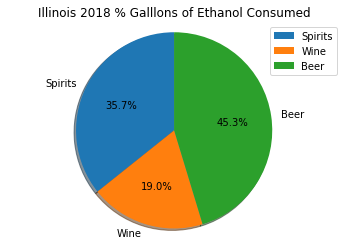

In [75]:
# declaring variables
il_gob_2018 = test_pie_chart_il_2018["Gallons of ethanol (absolute alcohol)"]
il_gob_2018_labels = test_pie_chart_il_2018["Type of Beverage"]

# creating pie plot
plt.title("Illinois 2018 % Galllons of Ethanol Consumed")
plt.pie(il_gob_2018, labels=il_gob_2018_labels, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(il_gob_2018_labels)
plt.axis("equal")
plt.show()

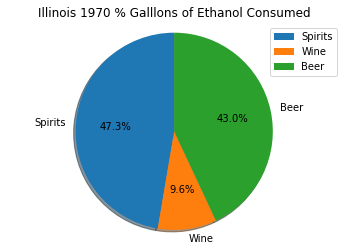

In [76]:
# declaring variables adding *100 because it helps for the percentage calc
il_gob_1970 = round(test_pie_chart_il_1970["Gallons of ethanol (absolute alcohol)"],6) * 100
il_gob_1970_labels = test_pie_chart_il_1970["Type of Beverage"]

# creating pie plot
plt.title("Illinois 1970 % Galllons of Ethanol Consumed")
plt.pie(il_gob_1970, labels=il_gob_1970_labels, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(il_gob_1970_labels)
plt.axis("equal")
plt.show()

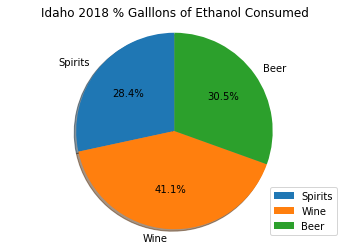

In [240]:
# declaring variables
id_gob_2018 = test_pie_chart_id_2018["Gallons of ethanol (absolute alcohol)"]
id_gob_2018_labels = test_pie_chart_id_2018["Type of Beverage"]

# creating pie plot
plt.title("Idaho 2018 % Galllons of Ethanol Consumed")
plt.pie(id_gob_2018, labels=id_gob_2018_labels, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(id_gob_2018_labels)
plt.axis("equal")
plt.show()

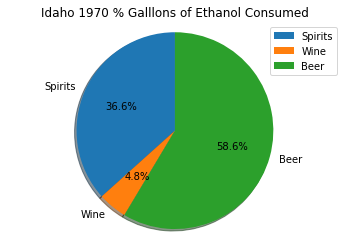

In [241]:
# declaring variables adding *100 because it helps for the percentage calc
id_gob_1970 = round(test_pie_chart_id_1970["Gallons of ethanol (absolute alcohol)"],6) * 100
id_gob_1970_labels = test_pie_chart_id_1970["Type of Beverage"]

# creating pie plot
plt.title("Idaho 1970 % Galllons of Ethanol Consumed")
plt.pie(id_gob_1970, labels=id_gob_1970_labels, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(id_gob_1970_labels)
plt.axis("equal")
plt.show()

In [107]:
us_bev_type_group = re_states_df_bev_type_ind.groupby(["Year","Type of Beverage"])
us_bev_type_sum_gob = us_bev_type_group["Gallons of ethanol (absolute alcohol)"].sum()
us_bev_type_sum_gob_df = pd.DataFrame(us_bev_type_sum_gob)
us_bev_type_sum_gob_df 

Gallons of ethanol (absolute alcohol)
Year Type of Beverage                                       
1970 Beer                                         169.632540
     Spirits                                      166.441500
     Wine                                          40.928160
1971 Beer                                         176.381280
     Spirits                                      171.952650
...                                                      ...
2017 Spirits                                      227.139081
     Wine                                         116.858931
2018 Beer                                         284.324200
     Spirits                                      234.674204
     Wine                                         117.898900

[147 rows x 1 columns]

In [110]:
merge_ind_us_df_bev_type = us_df_bev_type.set_index(['Year','Type of Beverage'])[["Gallons of ethanol per capita age 21 and older",
                                                                             "Gallons of ethanol per capita age 14 and older"]]
merge_ind_us_df_bev_type

Gallons of ethanol per capita age 21 and older  \
Year Type of Beverage                                                   
1970 Spirits                                                    13562   
     Wine                                                        3335   
     Beer                                                       13823   
1971 Spirits                                                    13681   
     Wine                                                        3765   
...                                                               ...   
2017 Wine                                                        4893   
     Beer                                                       11961   
2018 Spirits                                                     9741   
     Wine                                                        4894   
     Beer                                                       11802   

                       Gallons of ethanol per capita age 14 and older  
Year Type of Beverage                                                  
1970 Spirits                                                    11141  
     Wine                                                        2740  
     Beer                                                       11355  
1971 Spirits                                                    11213  
     Wine                                                        3086  
...                                                               ...  
2017 Wine                                                        4355  
     Beer                                                       10646  
2018 Spirits                                                     8677  
     Wine                                                        4359  
     Beer                                                       10513  

[147 rows x 2 columns]

In [208]:
us_year_type_summary = pd.merge(merge_ind_us_df_bev_type,us_bev_type_sum_gob_df,left_index=True, right_index=True)
rs_us_year_type_summary = us_year_type_summary.reset_index()
rs_us_year_type_summary["Gallons of ethanol per capita age 21 and older"] = rs_us_year_type_summary["Gallons of ethanol per capita age 21 and older"] / 10000
rs_us_year_type_summary["Gallons of ethanol per capita age 14 and older"] = rs_us_year_type_summary["Gallons of ethanol per capita age 14 and older"] / 10000
rs_us_year_type_summary

,Year,Type of Beverage,Gallons of ethanol per capita age 21 and older,Gallons of ethanol per capita age 14 and older,Gallons of ethanol (absolute alcohol)
0,1970,Spirits,1.3562,1.1141,166.441500
1,1970,Wine,0.3335,0.2740,40.928160
2,1970,Beer,1.3823,1.1355,169.632540
3,1971,Spirits,1.3681,1.1213,171.952650
4,1971,Wine,0.3765,0.3086,47.316960
...,...,...,...,...,...
142,2017,Wine,0.4893,0.4355,116.858931
143,2017,Beer,1.1961,1.0646,285.646747
144,2018,Spirits,0.9741,0.8677,234.674204
145,2018,Wine,0.4894,0.4359,117.898900


In [235]:
us_year_type_2018 = rs_us_year_type_summary.loc[rs_us_year_type_summary["Year"] == 2018]
us_year_type_2018

,Year,Type of Beverage,Gallons of ethanol per capita age 21 and older,Gallons of ethanol per capita age 14 and older,Gallons of ethanol (absolute alcohol)
144,2018,Spirits,0.9741,0.8677,234.674204
145,2018,Wine,0.4894,0.4359,117.898900
146,2018,Beer,1.1802,1.0513,284.324200


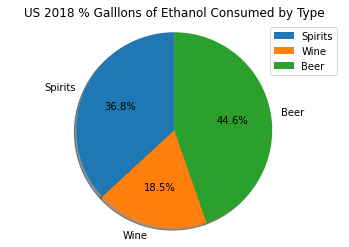

In [237]:
# declaring variables adding *100 because it helps for the percentage calc
us_gob_2018 = round(us_year_type_2018["Gallons of ethanol (absolute alcohol)"],6) * 100
us_gob_2018_labels = us_year_type_2018["Type of Beverage"]

# creating pie plot
plt.title("US 2018 % Galllons of Ethanol Consumed by Type")
plt.pie(us_gob_2018, labels=us_gob_2018_labels, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(us_gob_2018_labels)
plt.axis("equal")
plt.show()


In [209]:
#variables
years_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Spirits"]["Year"]
spirts_goe_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Spirits"]["Gallons of ethanol (absolute alcohol)"]
beer_goe_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Beer"]["Gallons of ethanol (absolute alcohol)"]
wine_goe_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Wine"]["Gallons of ethanol (absolute alcohol)"]

spirts_goe_cap21_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Spirits"]["Gallons of ethanol per capita age 21 and older"]
beer_goe_cap21_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Beer"]["Gallons of ethanol per capita age 21 and older"]
wine_goe_cap21_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Wine"]["Gallons of ethanol per capita age 21 and older"]

spirts_goe_cap14_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Spirits"]["Gallons of ethanol per capita age 14 and older"]
beer_goe_cap14_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Beer"]["Gallons of ethanol per capita age 14 and older"]
wine_goe_cap14_plt_us = rs_us_year_type_summary.loc[re_states_df_bev_type_ind["Type of Beverage"] == "Wine"]["Gallons of ethanol per capita age 14 and older"]


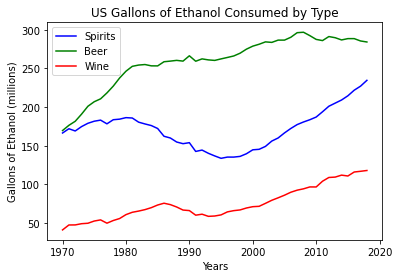

In [210]:
plt.plot(years_plt_us,spirts_goe_plt_us,"b-")
plt.plot(years_plt_us,beer_goe_plt_us,"g-")
plt.plot(years_plt_us,wine_goe_plt_us,"r-")
plt.legend(["Spirits","Beer","Wine",])
plt.title("US Gallons of Ethanol Consumed by Type")
plt.xlabel("Years")
plt.ylabel("Gallons of Ethanol (millions)")
plt.show()

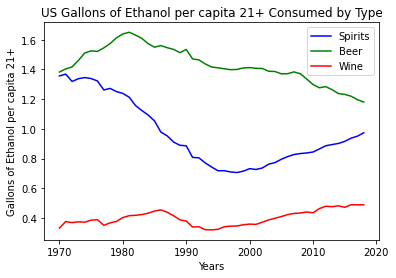

In [211]:
plt.plot(years_plt_us,spirts_goe_cap21_plt_us,"b-")
plt.plot(years_plt_us,beer_goe_cap21_plt_us,"g-")
plt.plot(years_plt_us,wine_goe_cap21_plt_us,"r-")
plt.legend(["Spirits","Beer","Wine",])
plt.title("US Gallons of Ethanol per capita 21+ Consumed by Type")
plt.xlabel("Years")
plt.ylabel("Gallons of Ethanol per capita 21+")
plt.show()

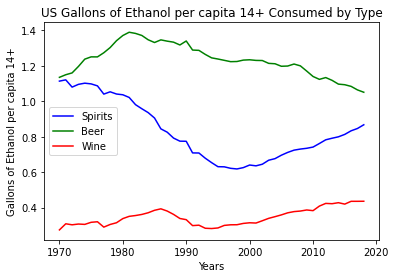

In [212]:
plt.plot(years_plt_us,spirts_goe_cap14_plt_us,"b-")
plt.plot(years_plt_us,beer_goe_cap14_plt_us,"g-")
plt.plot(years_plt_us,wine_goe_cap14_plt_us,"r-")
plt.legend(["Spirits","Beer","Wine",])
plt.title("US Gallons of Ethanol per capita 14+ Consumed by Type")
plt.xlabel("Years")
plt.ylabel("Gallons of Ethanol per capita 14+")
plt.show()

In [223]:
states_2018 = states_all_bev_final.loc[states_all_bev_final["Year"] == 2018]

In [224]:
states_2018["Gallons of ethanol per capita age 14 and older"] = states_2018["Gallons of ethanol per capita age 14 and older"] / 10000
states_2018["Gallons of ethanol per capita age 21 and older"] = states_2018["Gallons of ethanol per capita age 21 and older"] / 10000
states_2018

<ipython-input-224-1b7454989dde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_2018["Gallons of ethanol per capita age 14 and older"] = states_2018["Gallons of ethanol per capita age 14 and older"] / 10000
<ipython-input-224-1b7454989dde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_2018["Gallons of ethanol per capita age 21 and older"] = states_2018["Gallons of ethanol per capita age 21 and older"] / 10000


,Year,State_Region,Type of Beverage,Gallons of beverage,Gallons of ethanol,Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older
2448,2018,Alabama,All beverages,108.315856,8.038783,4.047832,1.9859,3.606639,2.2289
2449,2018,Alaska,All beverages,18.262321,1.687179,0.592174,2.8491,0.526639,3.2037
2450,2018,Arizona,All beverages,170.415406,13.300444,5.901635,2.2537,5.238099,2.5392
2451,2018,Arkansas,All beverages,57.688056,4.389660,2.468927,1.7780,2.191256,2.0033
2452,2018,California,All beverages,952.025633,81.205883,32.582978,2.4923,29.023186,2.7980
2453,2018,Colorado,All beverages,152.222103,13.586557,4.718558,2.8794,4.210663,3.2267
2454,2018,Connecticut,All beverages,74.881781,7.260321,3.020675,2.4035,2.681657,2.7074
2455,2018,Delaware,All beverages,27.840927,2.853275,0.810023,3.5225,0.726161,3.9293
2456,2018,District of Columbia,All beverages,21.397973,2.247698,0.595859,3.7722,0.543066,4.1389
2457,2018,Florida,All beverages,538.576453,47.091658,18.031395,2.6116,16.343540,2.8814


In [225]:



top_5_goe_2018 = ["California","Texas","Florida","New York","Pennsylvania"]
bot_5_goe_2018 = ["North Dakota","Alaska","South Dakota","Vermont","Wyoming"]
top_5_pcap21_2018 = ['New Hampshire','District of Columbia','Delaware','Nevada', 'North Dakota']
bot_5_pcap21_2018 = ['Georgia', 'Oklahoma', 'Arkansas', 'West Virginia', 'Utah']

top_5_goe_2018_df = states_2018.loc[states_2018["State_Region"].isin(top_5_goe_2018)].set_index("State_Region").loc[top_5_goe_2018]
bot_5_goe_2018_df = states_2018.loc[states_2018["State_Region"].isin(bot_5_goe_2018)].set_index("State_Region").loc[bot_5_goe_2018]
top_5_pcap21_2018_df = states_2018.loc[states_2018["State_Region"].isin(top_5_pcap21_2018)].set_index("State_Region").loc[top_5_pcap21_2018]
bot_5_pcap21_2018_df = states_2018.loc[states_2018["State_Region"].isin(bot_5_pcap21_2018)].set_index("State_Region").loc[bot_5_pcap21_2018]


top_5_pcap21_2018_df

,Year,Type of Beverage,Gallons of beverage,Gallons of ethanol,Population (age 14 and older),Gallons of ethanol per capita age 14 and older,Population (age 21 and older),Gallons of ethanol per capita age 21 and older
State_Region,,,,,,,,
New Hampshire,2018,All beverages,59.607732,5.432263,1.162817,4.6716,1.042882,5.2089
District of Columbia,2018,All beverages,21.397973,2.247698,0.595859,3.7722,0.543066,4.1389
Delaware,2018,All beverages,27.840927,2.853275,0.810023,3.5225,0.726161,3.9293
Nevada,2018,All beverages,95.760801,8.542228,2.498212,3.4193,2.246259,3.8029
North Dakota,2018,All beverages,24.169212,1.951449,0.616587,3.1649,0.548159,3.5600


<AxesSubplot:title={'center':'Top 5 States in Gallons of Ethanol Consumed - 2018'}, ylabel='Gallons of Ethanol (millions)'>

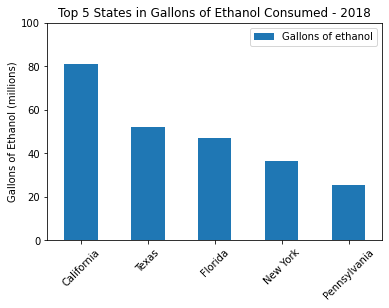

In [227]:
top_5_goe_2018_df.plot.bar(y="Gallons of ethanol",rot=45,ylabel="Gallons of Ethanol (millions)",xlabel="",
                          title="Top 5 States in Gallons of Ethanol Consumed - 2018",ylim=(0,100))


<AxesSubplot:title={'center':'Bottom 5 States in Gallons of Ethanol Consumed - 2018'}, ylabel='Gallons of Ethanol (millions)'>

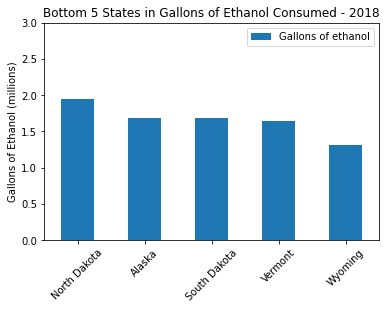

In [228]:
bot_5_goe_2018_df.plot.bar(y="Gallons of ethanol",rot=45,ylabel="Gallons of Ethanol (millions)",xlabel="",
                          title="Bottom 5 States in Gallons of Ethanol Consumed - 2018",ylim=(0,3))

<AxesSubplot:title={'center':'Top 5 States Gallons of Ethanol Consumed per Capita - 2018'}, ylabel='Gallons of Ethanol'>

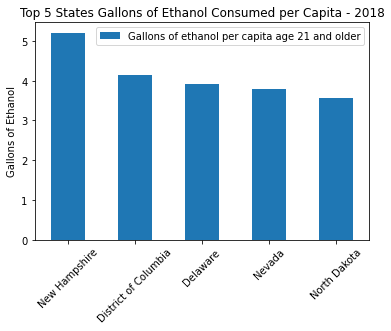

In [229]:
top_5_pcap21_2018_df.plot.bar(y="Gallons of ethanol per capita age 21 and older",rot=45,ylabel="Gallons of Ethanol",xlabel="",
                          title="Top 5 States Gallons of Ethanol Consumed per Capita - 2018")



<AxesSubplot:title={'center':'Bottom 5 States Gallons of Ethanol Consumed per Capita - 2018'}, ylabel='Gallons of Ethanol'>

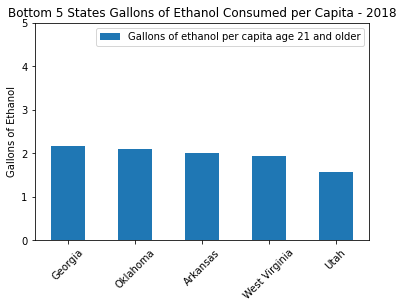

In [231]:
bot_5_pcap21_2018_df.plot.bar(y="Gallons of ethanol per capita age 21 and older",rot=45,ylabel="Gallons of Ethanol",xlabel="",
                          title="Bottom 5 States Gallons of Ethanol Consumed per Capita - 2018",ylim=(0,5))